In [7]:
from pyspark.sql import SparkSession
Spark = (SparkSession.builder.appName("capstone")\
        .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
        .enableHiveSupport().getOrCreate())

In [2]:
Spark

In [3]:
Spark.sql("select * from mounica.employeesorg").show()

+------+------------+----------+----------+----------+---+----------+--------------+------------------------+--------+----------+
|emp_no|emp_title_id|birth_date|first_name| last_name|sex| hire_date|no_of_projects|last_performance_ratings|left_org| last_date|
+------+------------+----------+----------+----------+---+----------+--------------+------------------------+--------+----------+
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
+------+------------+----------+----------+----------+---+----------+--------------+------------------------+--------+----------+
only showing top 20 rows



In [4]:
Spark.sql("select * from mounica.Employees_final").show()

+------+------------+----------+----------+----------+---+----------+--------------+------------------------+--------+----+
|emp_no|emp_title_id|birth_date|first_name| last_name|sex| hire_date|no_of_projects|last_performance_ratings|left_org|_c10|
+------+------------+----------+----------+----------+---+----------+--------------+------------------------+--------+----+
|473302|       s0001|1953-07-25|  Hideyuki|  Zallocco|  M|1990-04-28|             2|                       A|       0|null|
|475053|       e0002|1954-11-18|     Byong| Delgrande|  F|1991-09-07|             1|                       C|       0|null|
| 57444|       e0002|1958-01-30|     Berry|      Babb|  F|1992-03-21|             9|                       A|       0|null|
|421786|       s0001|1957-09-28|     Xiong|  Verhoeff|  M|1987-11-26|             2|                       C|       0|null|
|282238|       e0003|1952-10-28|Abdelkader|   Baumann|  F|1991-01-18|             6|                       B|       0|null|
|263976|

In [7]:
Spark.sql("select * from mounica.Departments").show()

+-------+------------------+
|dept_no|         dept_name|
+-------+------------------+
|   d001|         Marketing|
|   d002|           Finance|
|   d003|     HumanResource|
|   d004|        Production|
|   d005|       development|
|   d006|Quality Management|
|   d007|             Sales|
|   d008|          Research|
|   d009|  Customer Service|
+-------+------------------+



In [8]:
Spark.sql("select * from mounica.Department_Employees").show()

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
| 10004|   d004|
| 10005|   d003|
| 10006|   d005|
| 10007|   d008|
| 10008|   d005|
| 10009|   d006|
| 10010|   d004|
| 10010|   d006|
| 10011|   d009|
| 10012|   d005|
| 10013|   d003|
| 10014|   d005|
| 10015|   d008|
| 10016|   d007|
| 10017|   d001|
| 10018|   d004|
| 10018|   d005|
+------+-------+
only showing top 20 rows



In [9]:
Spark.sql("select * from mounica.Department_Managers").show()

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
|   d002|110085|
|   d002|110114|
|   d003|110183|
|   d003|110228|
|   d004|110303|
|   d004|110344|
|   d004|110386|
|   d004|110420|
|   d005|110511|
|   d005|110567|
|   d006|110725|
|   d006|110765|
|   d006|110800|
|   d006|110854|
|   d007|111035|
|   d007|111133|
|   d008|111400|
|   d008|111534|
+-------+------+
only showing top 20 rows



In [10]:
Spark.sql("select * from mounica.titles").show()

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
|   e0003|   Senior Engineer|
|   e0004|  Technique Leader|
|   m0001|Managerï»¿title_id|
|   s0001|             Staff|
|   s0002|      Senior Staff|
+--------+------------------+



In [11]:
Spark.sql("select * from mounica.Salaries").show()

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
| 10006| 40000|
| 10007| 56724|
| 10008| 46671|
| 10009| 60929|
| 10010| 72488|
| 10011| 42365|
| 10012| 40000|
| 10013| 40000|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10020| 40000|
+------+------+
only showing top 20 rows



# 1. A list showing employee number, last name, first name, sex, and salary for each employee1.

In [12]:
Spark.sql("select s.emp_no, e.last_name, e.first_name, e.sex, s.salary \
from mounica.employeesorg as e \
inner join mounica.Salaries as s \
on s.emp_no = e.emp_no \
order by s.emp_no").show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

# 1. A list showing first name, last name, and hire date for employees who were hired in 1986

In [13]:
Spark.sql("select emp_no, last_name, first_name, hire_date  \
from mounica.employeesorg \
where cast(substr( hire_date,7,4) as int) = '1986' ").show()

+------+-------------+--------------+----------+
|emp_no|    last_name|    first_name| hire_date|
+------+-------------+--------------+----------+
|263976|     Cusworth|          Eran|11/14/1986|
| 21529|     Zallocco|         Bojan|10/14/1986|
|419277|        Uhrig|        Freyja|12/20/1986|
|109820|       Ghelli|     Juichirou|12/13/1986|
|217945|        Georg|        Shmuel|11/30/1986|
|293092|        Kroha|        Baocai|10/27/1986|
| 11012|    Speckmann|       Taegyun|12/28/1986|
|424666|        Lambe|        Ingmar|10/21/1986|
| 63638|    Chepyzhov|          Adib|11/10/1986|
|450845|    Kavvadias|       Florina|12/14/1986|
|468684|    Middleton|        Georgi|11/24/1986|
|452448|       Kaiser|Chandrasekaran|12/30/1986|
|477276|       Kuszyk|        Susumu|12/12/1986|
|243221|     Schauser|           Gio|10/23/1986|
|460398|     Sinitsyn|        Junsik|11/21/1986|
|269252|Schwartzbauer|       Behnaam|10/17/1986|
|411230|      Giaccio|         Hauke|12/12/1986|
|240893|     Wuwongs

# 2. A list showing the manager of each department with the following information: department number, department name,the manager's employee number, last name, first name.

In [14]:
Spark.sql("select distinct  department_Managers.dept_no, Departments.dept_name, \
Department_Managers.emp_no, employeesorg.last_name, employeesorg.first_name \
from mounica.Department_Managers \
inner join mounica.Departments \
on Department_Managers.dept_no= Departments.dept_no \
inner join mounica.employeesorg \
on Department_Managers.emp_no = employeesorg.emp_no \
order by Department_Managers.dept_no").show()

+-------+------------------+------+------------+-----------+
|dept_no|         dept_name|emp_no|   last_name| first_name|
+-------+------------------+------+------------+-----------+
|   d001|         Marketing|110039|    Minakawa|   Vishwani|
|   d001|         Marketing|110022|  Markovitch|  Margareta|
|   d002|           Finance|110114|  Legleitner|      Isamu|
|   d002|           Finance|110085|       Alpin|       Ebru|
|   d003|     HumanResource|110183|Ossenbruggen|    Shirish|
|   d003|     HumanResource|110228|     Sigstam|    Karsten|
|   d004|        Production|110344|       Cools|     Rosine|
|   d004|        Production|110303|     Wegerle|  Krassimir|
|   d004|        Production|110420|    Ghazalie|      Oscar|
|   d004|        Production|110386|      Kieras|       Shem|
|   d005|       development|110567|    DasSarma|       Leon|
|   d005|       development|110511|    Hagimont|   DeForest|
|   d006|Quality Management|110800|     Quadeer|     Sanjoy|
|   d006|Quality Managem

# 3. A list showing the department of each employee with the following information: employee number, last name, first name, and department name

In [15]:
Spark.sql("select distinct  E.emp_no, E.last_name, E.first_name, D.dept_no, Departments.dept_name \
from mounica.employeesorg as E \
left join mounica.department_employees as D \
on E.emp_no = D.emp_no \
inner join mounica.Departments \
on D.dept_no = Departments.dept_no \
order by E.emp_no").show()

+------+-----------+----------+-------+------------------+
|emp_no|  last_name|first_name|dept_no|         dept_name|
+------+-----------+----------+-------+------------------+
| 10001|    Facello|    Georgi|   d005|       development|
| 10002|     Simmel|   Bezalel|   d007|             Sales|
| 10003|    Bamford|     Parto|   d004|        Production|
| 10004|    Koblick| Chirstian|   d004|        Production|
| 10005|   Maliniak|   Kyoichi|   d003|     HumanResource|
| 10006|    Preusig|    Anneke|   d005|       development|
| 10007|  Zielinski|   Tzvetan|   d008|          Research|
| 10008|   Kalloufi|    Saniya|   d005|       development|
| 10009|       Peac|    Sumant|   d006|Quality Management|
| 10010|   Piveteau| Duangkaew|   d006|Quality Management|
| 10010|   Piveteau| Duangkaew|   d004|        Production|
| 10011|      Sluis|      Mary|   d009|  Customer Service|
| 10012|  Bridgland|  Patricio|   d005|       development|
| 10013|     Terkki| Eberhardt|   d003|     HumanResourc

# 4. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [16]:
Spark.sql("select last_name, first_name \
from mounica.employeesorg \
where (first_name = 'Hercules') and (lower(last_name) like 'b%') \
order by last_name").show()

+-------------+----------+
|    last_name|first_name|
+-------------+----------+
|         Baak|  Hercules|
|         Baer|  Hercules|
|         Bahr|  Hercules|
|         Bail|  Hercules|
|         Bain|  Hercules|
|   Baranowski|  Hercules|
|     Barreiro|  Hercules|
|      Basagni|  Hercules|
|     Benantar|  Hercules|
|   Benzmuller|  Hercules|
|Bernardinello|  Hercules|
|    Bernatsky|  Hercules|
|      Berstel|  Hercules|
|        Biran|  Hercules|
|        Birge|  Hercules|
|        Biron|  Hercules|
|      Bisiani|  Hercules|
|       Bodoff|  Hercules|
|      Brendel|  Hercules|
|      Buchter|  Hercules|
+-------------+----------+



#  5. A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.


In [17]:
Spark.sql("select eo.emp_no, eo.last_name, eo.first_name, Departments.dept_name \
from mounica.employeesorg as eo \
inner join mounica.department_employees as D \
on D.emp_no = eo.emp_no \
inner join mounica.departments on D.dept_no= departments.dept_no \
where lower(departments.dept_name) = 'sales'").show()


+------+-------------+----------+---------+
|emp_no|    last_name|first_name|dept_name|
+------+-------------+----------+---------+
|246449|   Bultermann|     Subbu|    Sales|
|205246|       Demizu|     Nevio|    Sales|
|476443|       Asmuth|      Ziya|    Sales|
|424270|    Yoshizawa|    Kellyn|    Sales|
|280408|         Perl|   Elliott|    Sales|
|289261|     Nollmann|       Gad|    Sales|
|444985|     Verspoor|      Giap|    Sales|
|477628|Beutelspacher|      Duro|    Sales|
| 42625|        Swick|  Harngdar|    Sales|
| 85093|       Covnot| Nectarios|    Sales|
|205366|    Shimshoni|  Kazuhira|    Sales|
| 37601|    Naumovich|   Gilbert|    Sales|
|437985|        Munke|    Reuven|    Sales|
| 28823|     Skafidas|     Tonny|    Sales|
|107258|       Zaumen|    Parviz|    Sales|
| 11980|         Pews| Yechezkel|    Sales|
|457800|      Domenig| Stabislas|    Sales|
|414537|     Businaro|   Chikara|    Sales|
|414885|       Vecchi|   Candido|    Sales|
|217945|        Georg|    Shmuel

# 6. A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.


In [18]:
Spark.sql("select eo.emp_no, eo.last_name, eo.first_name, departments.dept_name \
from mounica.employeesorg as eo \
inner join mounica.department_employees \
on department_employees.emp_no = eo.emp_no \
inner join mounica.departments on department_employees.dept_no= departments.dept_no \
where (lower(departments.dept_name) = 'sales') or (lower(departments.dept_name) = 'development')").show()


+------+----------+----------+-----------+
|emp_no| last_name|first_name|  dept_name|
+------+----------+----------+-----------+
|208153|      Lunn|   Abdulah|development|
| 13616|     Lorho|     Perry|development|
|246449|Bultermann|     Subbu|      Sales|
| 21529|  Zallocco|     Bojan|development|
| 17934|  Wuwongse|  Bilhanan|development|
|205246|    Demizu|     Nevio|      Sales|
|476443|    Asmuth|      Ziya|      Sales|
|424270| Yoshizawa|    Kellyn|      Sales|
| 71530|  McAlpine|Venkatesan|development|
|280408|      Perl|   Elliott|      Sales|
|104639|   Escriba|    Theron|development|
|214555|     Copas|   Nechama|development|
| 35916|    Talmon|    Wonhee|development|
| 61583|    Vecchi|      Ziva|development|
|422587|     Speek|     Mohit|development|
| 48885| Antonisse|     Phuoc|development|
|244492|    Pettit|   Shaunak|development|
|289261|  Nollmann|       Gad|      Sales|
| 26941|  Masamoto|    Shigeu|development|
|444985|  Verspoor|      Giap|      Sales|
+------+---

# 7. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name).


In [19]:
Spark.sql("select last_name,count(last_name) as Frequency \
from mounica.employeesorg \
group by last_name \
order by Frequency desc").show()


+-----------+---------+
|  last_name|Frequency|
+-----------+---------+
|       Baba|      226|
|     Gelosh|      223|
|      Coorg|      223|
|    Sudbeck|      222|
|     Farris|      222|
|     Adachi|      221|
|     Osgood|      220|
|     Neiman|      218|
|    Mandell|      218|
|     Masada|      218|
|    Wendorf|      217|
|Boudaillier|      217|
|   Cummings|      216|
|    Solares|      216|
|     Mahnke|      216|
|     Pettis|      216|
|     Emmart|      215|
|   Birjandi|      215|
|   Collette|      215|
|    Kulisch|      215|
+-----------+---------+
only showing top 20 rows



# 8.  Histogram to show the salary distribution among the employees


In [20]:
Spark.sql("SELECT bins,count(bins) as salary_range \
from mounica.bins \
GROUP BY bins \
ORDER BY salary_range DESC").show()


+---------+------------+
|     bins|salary_range|
+---------+------------+
|  40k-50k|      158465|
|  50k-60k|       57915|
|  60k-70k|       41413|
|  70k-80k|       24814|
|  80k-90k|       11845|
| 90k-100k|        4284|
|100k-110k|        1069|
|110k-120k|         195|
|120k-130k|          24|
+---------+------------+



In [42]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
salaries = Spark.sql('select * from mounica.salaries')

In [25]:
Salary = salaries.toPandas()

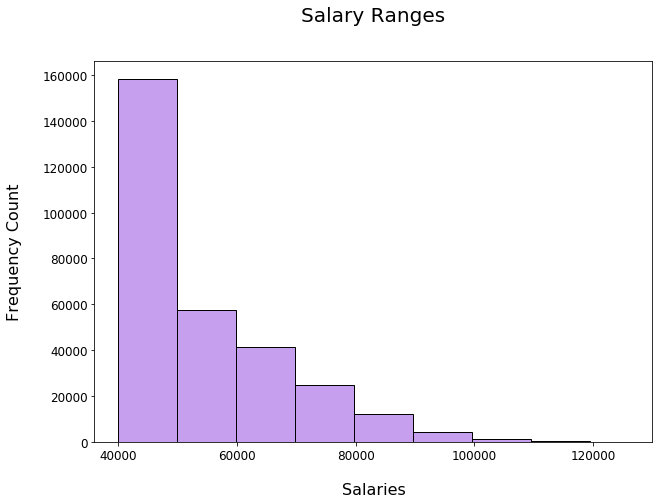

<Figure size 720x504 with 0 Axes>

In [34]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(Salary['salary'],bins=9,color='xkcd:lavender',alpha=1,edgecolor='black')
plt.title('Salary Ranges',fontsize=20,pad=40)
plt.xlabel('Salaries',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Save Figure
plt.savefig("employee_salary_ranges.png")

# Show plot
plt.show()

# 9). Bar graph to show Avg salary per title (designation)


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
AvergeSal = Spark.sql("SELECT t.title, avg(s.salary) as Avg_Salary \
FROM mounica.employeesorg as e \
JOIN mounica.titles t \
ON t.title_id = e.emp_title_id \
JOIN mounica.salaries s \
ON s.emp_no = e.emp_no \
GROUP BY t.title")

In [24]:
AverageSal = AvergeSal.toPandas()

In [25]:
AvergeSal.show()

+------------------+------------------+
|             title|        Avg_Salary|
+------------------+------------------+
|Managerï»¿title_id|51531.041666666664|
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



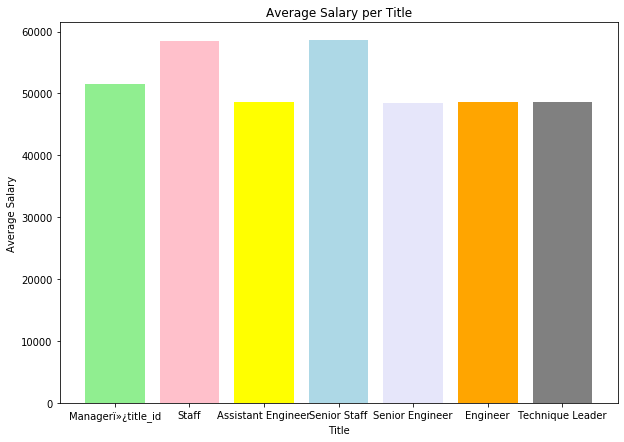

In [29]:
plt.rcParams['figure.figsize']=(10,7)

plt.bar(AverageSal['title'], AverageSal['Avg_Salary'], color = ['lightgreen','pink','yellow','lightblue','lavender','orange','grey'])
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Title")
plt.show()

# 10 Calculate employee tenure & show the tenure distribution among the employees


In [6]:
Spark.sql('SELECT  CONCAT(first_name," ",last_name," ") \
AS EmployeeName,emp_no,2000-year(hire_date) as tenure \
FROM mounica.Employees_final \
order by tenure desc').show()

+--------------------+------+------+
|        EmployeeName|emp_no|tenure|
+--------------------+------+------+
|      Stella Dayang |414400|    15|
|     Danel Bellmore | 30512|    15|
|      Rasiah Smeets |494817|    15|
|    Xudong Samarati |461591|    15|
|      Conal Wilfing | 41986|    15|
|    Feixiong Poujol |427958|    15|
|   Jeanna Francisci | 67762|    15|
|      Owen Hiraishi | 95280|    15|
|       Gladys Randt | 85630|    15|
|      Huiqun Rattan |426193|    15|
|         Fun Varman | 10571|    15|
|   Boriana Maginnis |494351|    15|
|Shigehiro Trogemann | 76229|    15|
|       Uzi Poehlman |470413|    15|
|  Nidapan Braunmuhl |210276|    15|
|      Renee Milicia | 13503|    15|
|       JoAnne Anido | 86672|    15|
|        Xuejun Luiz |418149|    15|
|          Van Miara | 33808|    15|
|  Honesty Schrooten |209612|    15|
+--------------------+------+------+
only showing top 20 rows



# 11 A list to show the emp no and dept name

In [30]:
Spark.sql("SELECT e.emp_no,d.dept_name \
from mounica.department_employees as e \
JOIN mounica.departments as d \
on e.dept_no = d.dept_no").show()

+------+------------------+
|emp_no|         dept_name|
+------+------------------+
| 10001|       development|
| 10002|             Sales|
| 10003|        Production|
| 10004|        Production|
| 10005|     HumanResource|
| 10006|       development|
| 10007|          Research|
| 10008|       development|
| 10009|Quality Management|
| 10010|        Production|
| 10010|Quality Management|
| 10011|  Customer Service|
| 10012|       development|
| 10013|     HumanResource|
| 10014|       development|
| 10015|          Research|
| 10016|             Sales|
| 10017|         Marketing|
| 10018|        Production|
| 10018|       development|
+------+------------------+
only showing top 20 rows



# 12. A list showing employee firstname,last name and salary

In [31]:
Spark.sql("select e.first_name,e.last_name,s.salary \
from mounica.employeesorg as e \
join mounica.salaries as s \
on e.emp_no = s.emp_no").show()

+----------+----------+------+
|first_name| last_name|salary|
+----------+----------+------+
|  Hideyuki|  Zallocco| 40000|
|     Byong| Delgrande| 53422|
|     Berry|      Babb| 48973|
|     Xiong|  Verhoeff| 40000|
|Abdelkader|   Baumann| 40000|
|      Eran|  Cusworth| 40000|
| Christoph|   Parfitt| 56087|
|    Xudong|  Samarati| 40000|
|    Lihong| Magliocco| 54816|
| Kwangyoen|     Speek| 40000|
|   Shuichi|     Tyugu| 40000|
|   Abdulah|      Lunn| 50183|
|     Perry|     Lorho| 40000|
|     Subbu|Bultermann| 87084|
|     Bojan|  Zallocco| 40000|
|  Bilhanan|  Wuwongse| 48795|
|Venkatesan|      Gilg| 63016|
|   Naftali|     Dulli| 57715|
|     Roddy|    Karnin| 43548|
|     Nevio|    Demizu| 80252|
+----------+----------+------+
only showing top 20 rows



# --13 A list showing the number of employees working in each department


In [32]:
Spark.sql("select count(d.dept_no) as Number_of_employees, de.dept_name \
from mounica.departments as de \
join mounica.department_employees as d \
on de.dept_no = d.dept_no \
group by de.dept_name").show()

+-------------------+------------------+
|Number_of_employees|         dept_name|
+-------------------+------------------+
|              52245|             Sales|
|              20117|Quality Management|
|              17346|           Finance|
|              73485|        Production|
|              21126|          Research|
|              23580|  Customer Service|
|              20211|         Marketing|
|              85707|       development|
|              17786|     HumanResource|
+-------------------+------------------+



# 14 A list concating first name and last name of employees


In [33]:
from pyspark.sql.functions import concat

In [34]:
Spark.sql('SELECT CONCAT(first_name," ",last_name," ") AS EmployeeName from mounica.employeesorg').show()

+-------------------+
|       EmployeeName|
+-------------------+
| Hideyuki Zallocco |
|   Byong Delgrande |
|        Berry Babb |
|    Xiong Verhoeff |
|Abdelkader Baumann |
|     Eran Cusworth |
| Christoph Parfitt |
|   Xudong Samarati |
|  Lihong Magliocco |
|   Kwangyoen Speek |
|     Shuichi Tyugu |
|      Abdulah Lunn |
|       Perry Lorho |
|  Subbu Bultermann |
|    Bojan Zallocco |
| Bilhanan Wuwongse |
|   Venkatesan Gilg |
|     Naftali Dulli |
|      Roddy Karnin |
|      Nevio Demizu |
+-------------------+
only showing top 20 rows



# 15 A list to show employee name and their designation

In [36]:
Spark.sql('SELECT CONCAT(e.first_name," ",e.last_name," ") AS EmployeeName, t.title as Designation from mounica.employeesorg as e \
join mounica.titles as t \
on e.emp_title_id = t.title_id').show()

+-------------------+----------------+
|       EmployeeName|     Designation|
+-------------------+----------------+
| Hideyuki Zallocco |           Staff|
|   Byong Delgrande |        Engineer|
|        Berry Babb |        Engineer|
|    Xiong Verhoeff |           Staff|
|Abdelkader Baumann | Senior Engineer|
|     Eran Cusworth | Senior Engineer|
| Christoph Parfitt |           Staff|
|   Xudong Samarati |    Senior Staff|
|  Lihong Magliocco |        Engineer|
|   Kwangyoen Speek |    Senior Staff|
|     Shuichi Tyugu |        Engineer|
|      Abdulah Lunn | Senior Engineer|
|       Perry Lorho | Senior Engineer|
|  Subbu Bultermann |           Staff|
|    Bojan Zallocco |        Engineer|
| Bilhanan Wuwongse |Technique Leader|
|   Venkatesan Gilg |           Staff|
|     Naftali Dulli |        Engineer|
|      Roddy Karnin |Technique Leader|
|      Nevio Demizu |    Senior Staff|
+-------------------+----------------+
only showing top 20 rows



# 16  what is the highest salary for the employees

In [37]:
Spark.sql("select max(salary) as highest_salary from salaries").show()

+--------------+
|highest_salary|
+--------------+
|        129492|
+--------------+

